In [1]:
__author__ = 'J.-M. Delouis <jean.marc.delouis@ifremer.fr>'
__date__ = '2018-08-31'
__email__ = 'jean.marc.delouis@ifremer.fr'
__description__ = ('Compute scattering transform')
__author_email__ = ('jean.marc.delouis@ifremer.fr')

import numpy as np
import matplotlib as mpl
#mpl.use('PDF')
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
from scatter import scatter
import scipy as scipy

In [2]:
#=======================================================================
# Init scatter2D :
#=======================================================================
ndata=64
nstep=5
norient=8
scat=scatter.scatter2d(ndata,nstep,norient)

In [3]:
#=======================================================================
# Read input 2D data :
#=======================================================================
data=np.fromfile('turb2D.dat',dtype='float').reshape(64,64)
data-=data.mean()

In [4]:
#=======================================================================
# Compute noise with the same powespectrum :
#=======================================================================
sdata=scat.cnoise(-(5/3.))
sdata-=sdata.mean()
sdata*=data.std()/sdata.std()

In [5]:
#=======================================================================
# Compute  2Dx2 Levels Scaterring Transform
#=======================================================================
coef1_data,coef2_data,dii,doo = scat.compute(data)
coef1_sdata,coef2_sdata,dii,doo = scat.compute(sdata)

In [6]:
#=======================================================================
# Compute powerspectrum
#=======================================================================
no_orient_spec=scat.spec1D(data)
no_orient_sspec=scat.spec1D(sdata)

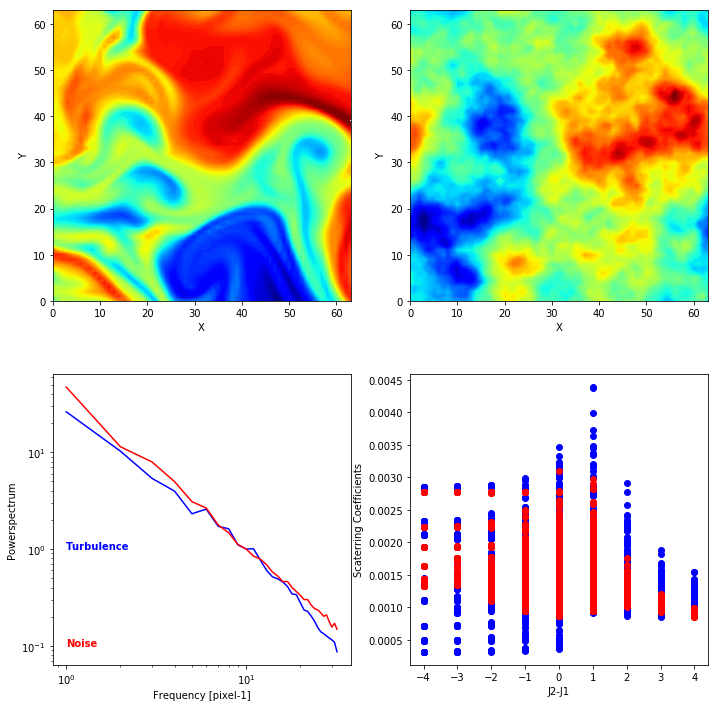

In [7]:
#=======================================================================
# VARIOUS PLOT TO COMPARE NOISE and TURBULENCE
#=======================================================================
f=plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.07, bottom = 0.07, right = 0.98, top = 0.98, wspace = 0.2, hspace = 0.25)
plt.subplot(221)
plt.contourf(data,cmap='jet',levels=np.arange(100)*(data.max()-data.min())/100+data.min())
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(222)
plt.contourf(sdata,cmap='jet',levels=np.arange(100)*(sdata.max()-sdata.min())/100+sdata.min())
plt.xlabel('X')
plt.ylabel('Y')
plt.subplot(223)
plt.plot(1+np.arange(32),no_orient_spec[1:33]/no_orient_spec[10],color='blue')
plt.plot(1+np.arange(32),no_orient_sspec[1:33]/no_orient_sspec[10],color='red')
plt.xlabel('Frequency [pixel-1]')
plt.ylabel('Powerspectrum')
plt.xscale('log')
plt.yscale('log')
plt.text(1,1,'Turbulence',fontweight = 'bold',color='blue',horizontalalignment='left')
plt.text(1,1E-1,'Noise',fontweight = 'bold',color='red',horizontalalignment='left')

plt.subplot(224)
plt.plot(dii.reshape(nstep*norient*nstep*norient),coef2_data.reshape(nstep*norient*nstep*norient),'o',color='blue')
plt.plot(dii.reshape(nstep*norient*nstep*norient),coef2_sdata.reshape(nstep*norient*nstep*norient),'o',color='red')
plt.ylabel('Scaterring Coefficients')
plt.xlabel('J2-J1')
plt.show()
f.savefig('demo_scatter2d.pdf',bbox_inches='tight')

Iteration :  0 0.0009192341455393781
Iteration :  1 0.0008616344098959942
Iteration :  2 0.0008081161637459989
Iteration :  3 0.0007749299523919745
Iteration :  4 0.0007399920979522525
Iteration :  5 0.000700369178896488
Iteration :  6 0.0006704479008282553
Iteration :  7 0.0006334389222521364
Iteration :  8 0.0005983275928965955
Iteration :  9 0.0005668683143834861
Iteration :  10 0.0005407130640898193
Iteration :  11 0.0005166749421720933
Iteration :  12 0.0004896377264376392
Iteration :  13 0.00046044020800347935
Iteration :  14 0.00043493445676191935
Iteration :  15 0.00041327270728489527
Iteration :  16 0.00038656872546330136
Iteration :  17 0.00037384562358140215
Iteration :  18 0.000357921319884664
Iteration :  19 0.0003442196626076789
Iteration :  20 0.00032881239592179084
Iteration :  21 0.0003149968393560655
Iteration :  22 0.000299091902073321
Iteration :  23 0.00028489980994170694
Iteration :  24 0.0002752470542130237
Iteration :  25 0.00026321590736606165
Iteration :  26 0

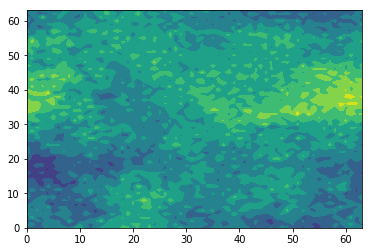

CPU times: user 48min 36s, sys: 9.37 s, total: 48min 45s
Wall time: 48min 42s


In [8]:
#=======================================================================
# Synthetize data :
#=======================================================================
#=    ^     :
#=   /|\    : Be aware that this synthesis process is VERY VERY long !!!
#   /_°_\   : In this example it is not yet optimise et to be rewritten
#=======================================================================
%time synthe_data=scat.synthetize(coef1_data,coef2_data,sdata)

/appli/anaconda/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in true_divide
/appli/anaconda/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in true_divide


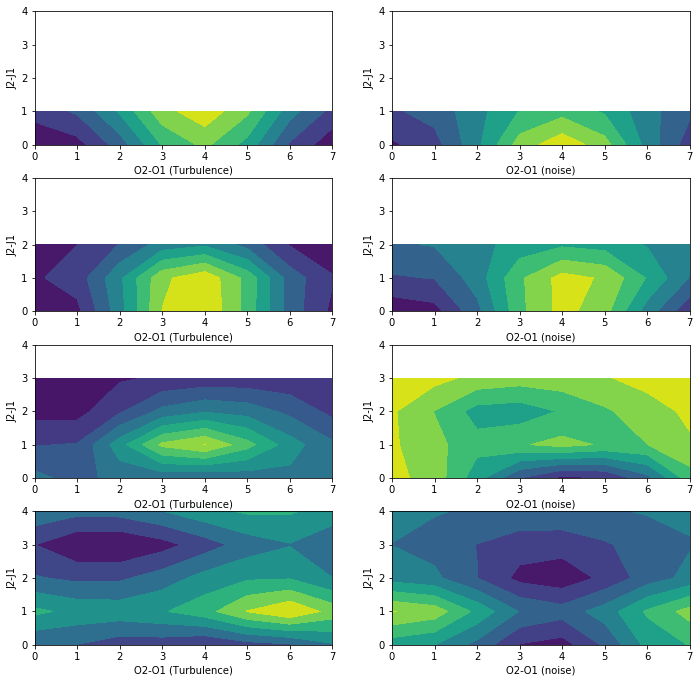

In [9]:
#===============================================================================
# VARIOUS PLOT TO COMPARE NOISE and TURBULENCE SCATERRING TRANSFORM COEFFICIENTS
#===============================================================================
f=plt.figure(figsize = (10, 10))
plt.gcf().subplots_adjust(left = 0.07, bottom = 0.1, right = 0.98, top = 0.98, wspace = 0.2, hspace = 0.25)  
for ii in range(nstep-1):
    i=ii+1
    res=np.zeros([nstep,norient])
    nres=np.zeros([nstep,norient])
    res2=np.zeros([nstep,norient])
    for j in range(norient):
        tmp=np.log(coef2_data[:,:,i,j])-np.log(coef1_data[:,:])
        tmp2=np.log(coef2_sdata[:,:,i,j])-np.log(coef1_sdata[:,:])
        for k in range(norient):
            for l in range(nstep):
                if int(dii[l,k,i,j])>=0:
                    res[int(dii[l,k,i,j]),(j-k+norient+norient//2)%norient]+=tmp[l,k]
                    res2[int(dii[l,k,i,j]),(j-k+norient+norient//2)%norient]+=tmp2[l,k]
                    nres[int(dii[l,k,i,j]),(j-k+norient+norient//2)%norient]+=1

    plt.subplot(4,2,1+ii*2)   
    plt.contourf(res/nres) 
    plt.ylabel('J2-J1') 
    plt.xlabel('O2-O1 (Turbulence)') 
    plt.subplot(4,2,2+ii*2)    
    plt.contourf(res2/nres)
    plt.ylabel('J2-J1') 
    plt.xlabel('O2-O1 (noise)') 

plt.show()
f.savefig('demo_scatter2d_COEF.pdf',bbox_inches='tight')